# PAA - Ordenação

## Setup

In [1]:
%pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


### Importação

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import os
import shutil

## Criação dos valores a serem ordenados

In [3]:
qtd_values = [200_000, 400_000, 600_000,1_000_000]
dados = {
  'Ordem_crescente': [np.arange(1, qtd + 1) for qtd in qtd_values],
  'Ordem_decrescente': [np.arange(qtd, 0, -1) for qtd in qtd_values],
  'Ordem_aleatoria_pemutation': [np.random.permutation(qtd) for qtd in qtd_values]
}

### Exibindo amostragem


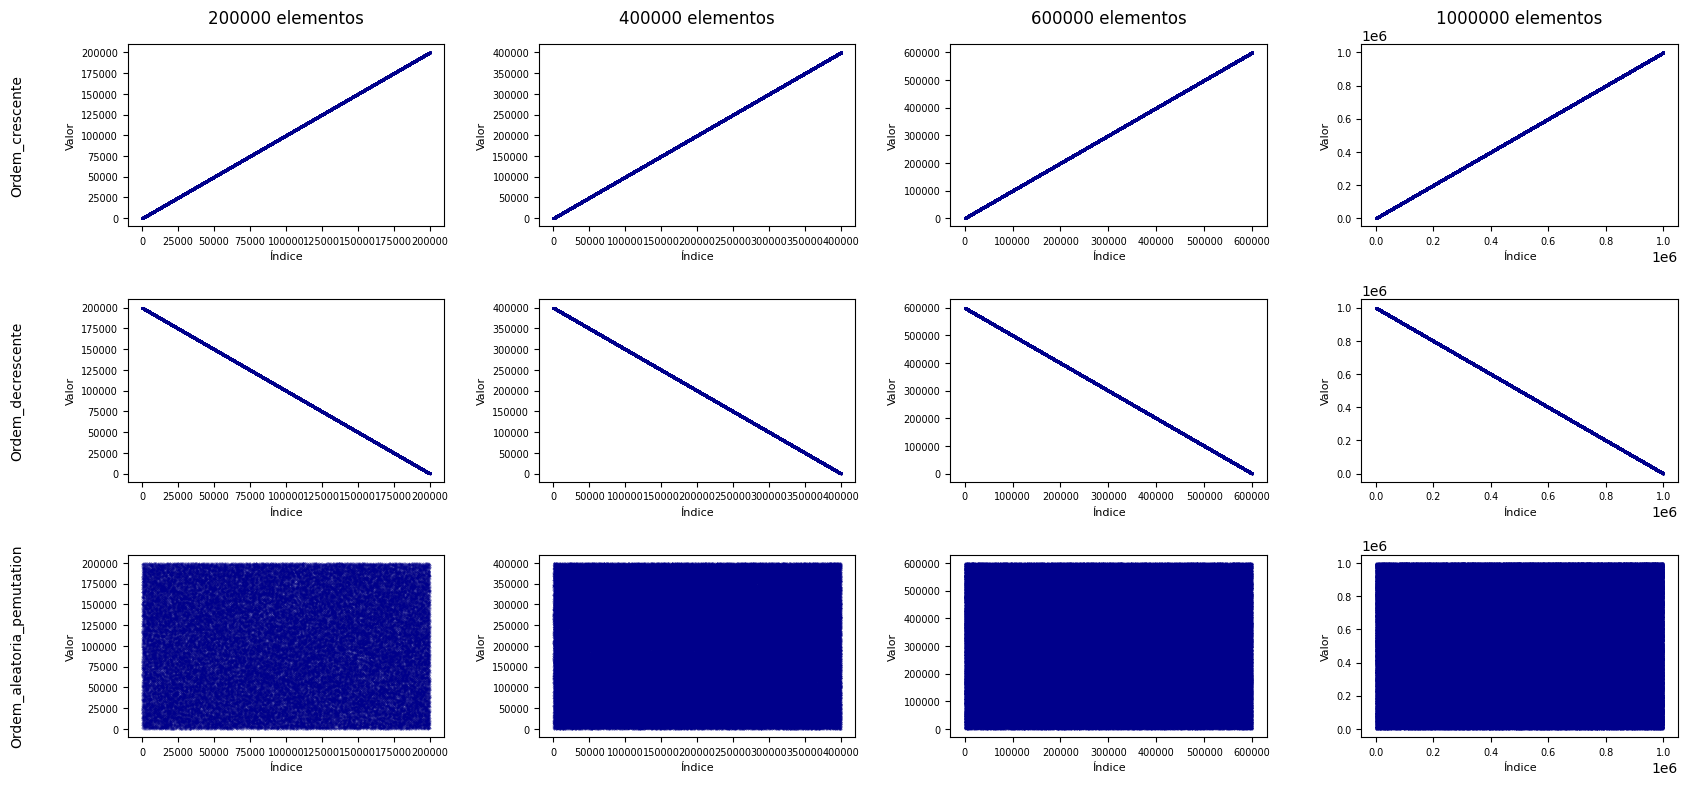

In [4]:
n_rows = len(dados)
n_cols = len(qtd_values)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5*n_cols, 3*n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for ax, qtd in zip(axs[0] if n_rows > 1 else axs, qtd_values):
    ax.set_title(f'{qtd} elementos', pad=15)

for row_idx, (ordem, valores) in enumerate(dados.items()):
    for col_idx, arr in enumerate(valores):
        ax = axs[row_idx, col_idx] if n_rows > 1 else axs[col_idx]
        x = np.arange(len(arr))
        ax.scatter(x, arr, s=0.1, alpha=0.3, color='darkblue')
        ax.set_xlabel('Índice', fontsize=8)
        ax.set_ylabel('Valor', fontsize=8)
        ax.tick_params(axis='both', labelsize=7)

    if n_rows > 1:
        axs[row_idx, 0].annotate(
            ordem,
            xy=(-0.25 if n_cols <=3 else -0.35, 0.5),
            xycoords='axes fraction',
            rotation=90,
            fontsize=10,
            ha='center',
            va='center'
        )
    else:
        axs[0].annotate(
            ordem,
            xy=(-0.25 if n_cols <=3 else -0.35, 0.5),
            xycoords='axes fraction',
            rotation=90,
            fontsize=10,
            ha='center',
            va='center'
        )

plt.show()

### Salvando amostragem em txt

In [5]:
paths = []

shutil.rmtree('files', ignore_errors=True)
os.makedirs('files', exist_ok=True)

for title, values in dados.items():
    for i, value in enumerate(values):
        path = f'files/{title}/{len(value)}.csv'
        paths.append(path)
        
        os.makedirs(os.path.dirname(path), exist_ok=True)
        
        df = pd.DataFrame(value)
        df.to_csv(path, index=False, header=False)
        
print(f'Arquivos salvos em {os.path.abspath("files")}')

Arquivos salvos em /home/jonascgn/Trabalhos/Trabalho-1---PAA/files


## Block Sorting

O tipo de bloco é um algoritmo de classificação que classifica um array dividindo-o em blocos de tamanho fixo, classificando cada bloco individualmente e, em seguida, mesclando os blocos classificados de volta em uma única matriz ordenada. O Block sort é uma boa opção para classificar grandes conjuntos de dados que não cabem na memória. Ele pode classificar eficientemente os dados em blocos que se encaixam na memória e, em seguida, mesclar os blocos classificados juntos para obter a matriz ordenada final.



### Executando o algoritmo para cada amostragem



In [26]:
%%capture results_block_sort
args = f""
results = {}

for path in paths:
    tamanho = path.split('/')[-1].split('.')[0]
    
    args_copy = f"""FILE_PATH={path} SIZE_ARR={tamanho} BLOCK_SIZE={int(tamanho) / 4} SHOW_VECTOR_RESULT=0 QTD_TESTES=20
    """
    
    !make -B block_sort {args_copy}

In [27]:
print(results_block_sort.stdout)

files/Ordem_crescente/200000.csv 0.020781
files/Ordem_crescente/400000.csv 0.043831
make: Warning: File 'block_sort' has modification time 0.77 s in the future
files/Ordem_crescente/600000.csv 0.065145
make: warning:  Clock skew detected.  Your build may be incomplete.
files/Ordem_crescente/1000000.csv 0.113001
files/Ordem_decrescente/200000.csv 0.021250
files/Ordem_decrescente/400000.csv 0.044203
files/Ordem_decrescente/600000.csv 0.066188
files/Ordem_decrescente/1000000.csv 0.114374
files/Ordem_aleatoria_pemutation/200000.csv 0.023282
files/Ordem_aleatoria_pemutation/400000.csv 0.046439
files/Ordem_aleatoria_pemutation/600000.csv 0.070644
files/Ordem_aleatoria_pemutation/1000000.csv 0.117097



# Radix Sort

In [28]:
%%capture results_radix_sort
results = {}

for path in paths:
    tamanho = path.split('/')[-1].split('.')[0]
    
    args_copy = f"FILE_PATH={path} SIZE_ARR={tamanho} SHOW_VECTOR_RESULT=0 QTD_TESTES=20"
    
    !make -B radix_sort {args_copy}

In [34]:
print(results_radix_sort.stdout)

files/Ordem_crescente/200000.csv 0.019927
files/Ordem_crescente/400000.csv 0.040257
files/Ordem_crescente/600000.csv 0.059780
files/Ordem_crescente/1000000.csv 0.116281
files/Ordem_decrescente/200000.csv 0.019977
files/Ordem_decrescente/400000.csv 0.040017
files/Ordem_decrescente/600000.csv 0.060289
files/Ordem_decrescente/1000000.csv 0.116906
files/Ordem_aleatoria_pemutation/200000.csv 0.020046
files/Ordem_aleatoria_pemutation/400000.csv 0.040099
files/Ordem_aleatoria_pemutation/600000.csv 0.060133
make: Warning: File 'radix_sort' has modification time 0.39 s in the future
files/Ordem_aleatoria_pemutation/1000000.csv 0.101316
make: warning:  Clock skew detected.  Your build may be incomplete.



## Show values

In [32]:
def processing(output):
  data_processing = {}

  for line in str(output.stdout).splitlines(): # type: ignore
    if not line.startswith("files/"):
      continue

    parts = line.split()
    file_path = parts[0]
    temp = parts[1]

    type_ = file_path.split('/')[1]
    qtd = file_path.split('/')[-1].split('.')[0]

    if not data_processing.get(type_):
      data_processing[type_] = {qtd: temp}
    else:
      data_processing[type_][qtd] = temp

  return data_processing

def plot_data(data_processing):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.set_title('Análise de Tempo de Execução')
  ax.set_xlabel('Tamanho do vetor')
  ax.set_ylabel('Tempo (s)')

  ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

  for type_, data in data_processing.items():
    x = [int(k) for k in data.keys()]
    y = [float(v) for v in data.values()]
    ax.plot(x, y, label=type_, marker='o', markersize=5)

  ax.legend()
  ax.grid()
  plt.show()


### Exibindo amostragem do Block Sort

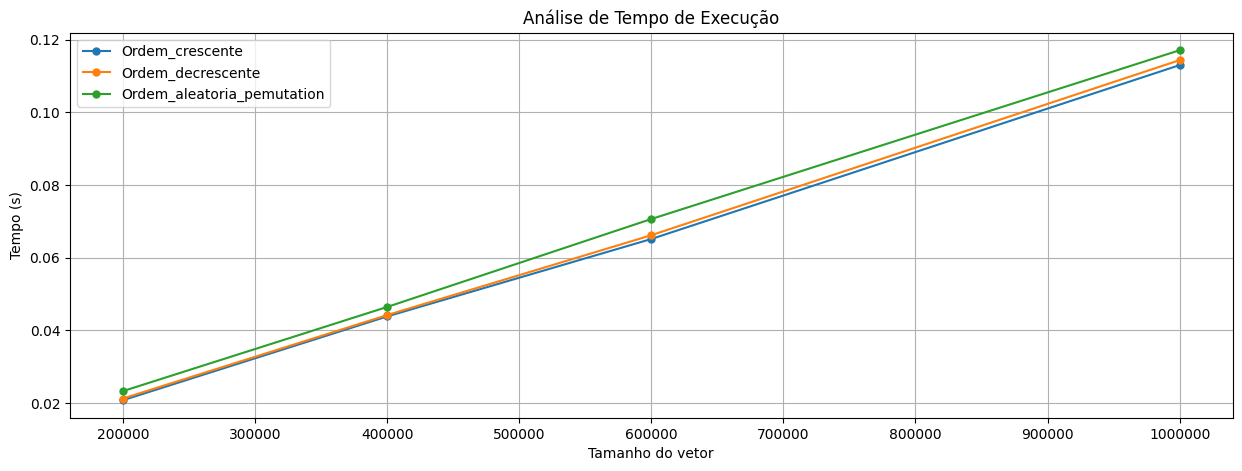

In [33]:
data_block = processing(results_block_sort)
plot_data(data_block)

### Exibindo amostragem do Radix Sort

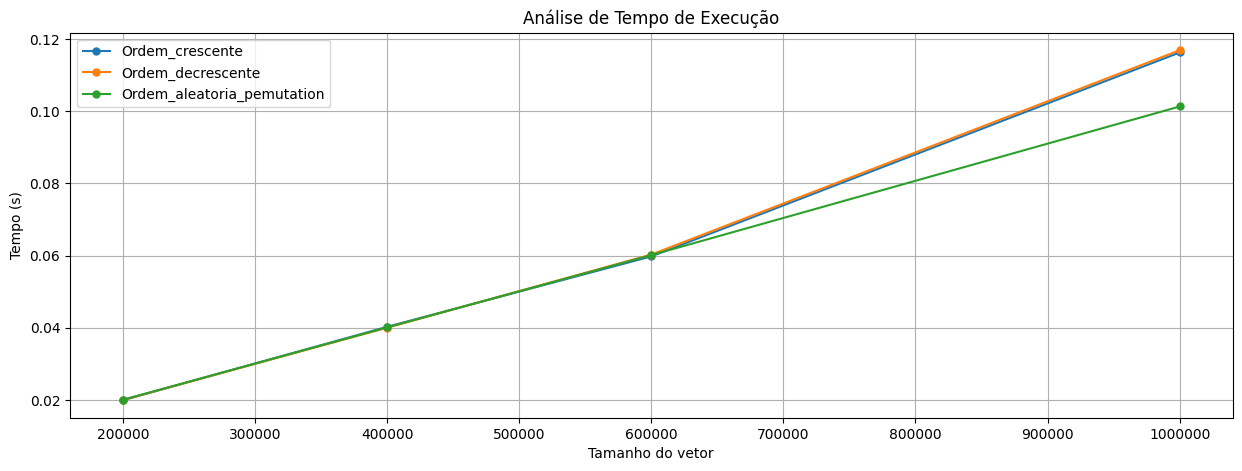

In [35]:
data_radix = processing(results_radix_sort)
plot_data(data_radix)

### Comparação entre os dois algoritmos

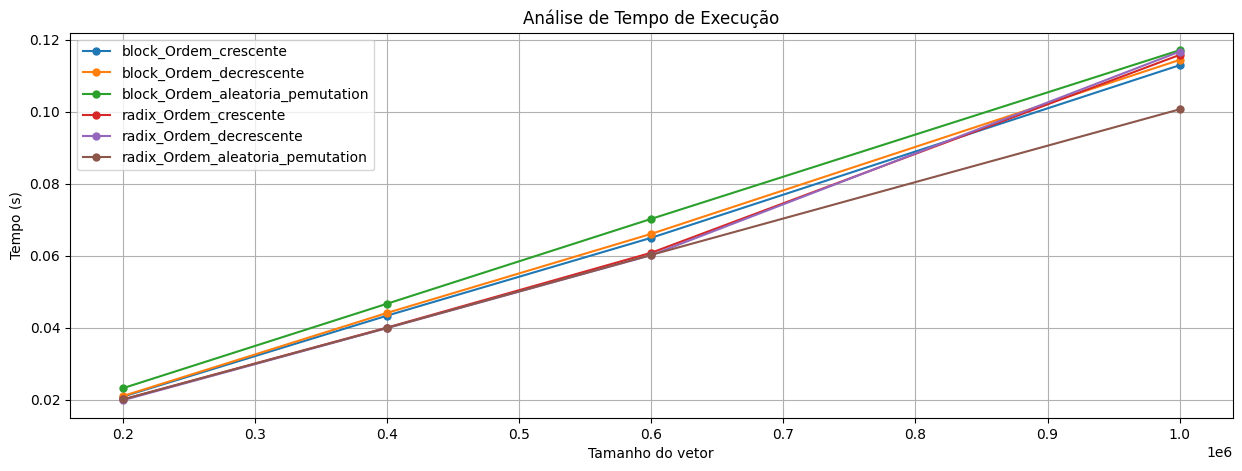

In [13]:
plt.figure(figsize=(15, 5))
plt.title('Análise de Tempo de Execução')
plt.xlabel('Tamanho do vetor')
plt.ylabel('Tempo (s)')

for type_, data in data_block.items():
    x = list(map(int, data.keys()))
    y = list(map(float, data.values()))
    plt.plot(x, y, label=f"block_{type_}", marker='o', markersize=5)
    
for type_, data in data_radix.items():
    x = list(map(int, data.keys()))
    y = list(map(float, data.values()))
    plt.plot(x, y, label=f"radix_{type_}", marker='o', markersize=5)
    
plt.legend()
plt.grid()
plt.show()
